## King County Realty Analysis

* Student names: Ian Musau, Mathew Karani, Jacinta Chepkemoi, Christine Malinga and Tabitha Berum.
* Student pace: Full time
* Instructor name: Nikita Njoroge


## Business Problem

#### Overview
The client is King County Realty. A real estate company looking to understand the anatomy of a high priced home. Armed with a dataset of house sales in King County, the team of analysts look to define the most sought after characteristics in a home.

This analysis will focus on the following factors that majorly affect the real estate industry to achieve the client's request:<br>
- Market Trends: This analysis will help the client make well-informed decisions about the purchase, sale, and investment strategies of real estate. The dataset provides insights into pricing dynamics, market trends, and property features.<br>
- Customer Preferences: Understanding of consumer preferences and market demand through analysis of bedroom and bathroom numbers, property condition, view ratings makes targeted markeing and property customization easier and more scalable so as to suit all their clients' expectations.<br>
- Investment Opportunities: By analyzing variables including property size, location, condition, and market trends, investors in real estate can find properties that are cheap, evaluate possible returns, and optimize their investment portfolios.<br>
- Competitive Analysis: Real estate agents can benchmark against rivals, spot market gaps, and more by comparing property prices, sizes, amenities, and location features and set themselves out from the competition to obtain a market advantage.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

The dataset "data_sourcing" contains a plethora of information about real estate properties, such as property IDs, price ranges, dates of sales, number of bedrooms and bathrooms, living space and lot sizes, floor counts, waterfront access, view ratings, property condition and grade, years of construction and renovation, geographic coordinates, and information about competitive neighborhoods.

Containing 21 columns and over 21,000 items, the dataset offers a plethora of data for investigating correlations, trends, and patterns in the real estate market. The diversity of property variables and the quantity of unique values in each column reflect the heterogeneity and complexity of the real estate landscape represented in the dataset.

Gaining an understanding of the differences included in each characteristic and how they are distributed is essential for doing important analyses, such as identifying the factors influencing property values, assessing neighborhood characteristics, and predicting market trends. Furthermore, it will be crucial to address data quality issues like missing values, outliers, and inconsistent data types in order to ensure the accuracy and reliability of any studies or models based on this dataset.

In [268]:
class DataSourcing:
  def __init__(self,dataframe):
    self.original = dataframe
    self.dataframe = dataframe
  
  def give_info(self):
    message =  f"""
    ----------------------------------------------------------------------->
    DESCRIPTION OF THE DATAFRAME IN QUESTION:
    ----------------------------------------------------------------------->
    
    Dataframe information => {self.dataframe.info()}
    ------------------------------------------------------------------------------------------------------------------------->
    
    Dataframe shape => {self.dataframe.shape[0]} rows, {self.dataframe.shape[1]} columns
    ------------------------------------------------------------------------------------------------------------------------->    
    
    There are {len(self.dataframe.columns)} columns, namely: {self.dataframe.columns}.  
    ------------------------------------------------------------------------------------------------------------------------->
        
    The first 5 records in the dataframe are seen here:
    ------------------------------------------------------------------------------------------------------------------------->
    {self.dataframe.head()}
    ------------------------------------------------------------------------------------------------------------------------->
       
    The last 5 records in the self.dataframe are as follows: 
    ------------------------------------------------------------------------------------------------------------------------->
    {self.dataframe.tail()}
    ------------------------------------------------------------------------------------------------------------------------->
    
    The descriptive statistics of the dataframe (mean,median, max, min, std) are as follows:
    ------------------------------------------------------------------------------------------------------------------------->
    {self.dataframe.describe()}
    ------------------------------------------------------------------------------------------------------------------------->
    """
    print (message)
  
  def null_count(self):
    return self.dataframe.isnull().sum()
  
  def unique_count(self):
    return self.dataframe.nunique()
  
  def unique_per_column(self):
    print("<----- UNIQUE VALUES IN EACH COLUMN ----->")
    for col in self.dataframe.columns:
      print(f"{col} ({len(self.dataframe[col].unique())} unique)\n {sorted(self.dataframe[col].unique())}")
      print()
    print("<----- END OF UNIQUE VALUES IN EACH COLUMN ----->")
    return


Load the CSV dataset

In [269]:
# Call the load_data() function to load the data
self = pd.read_csv('data/kc_house_data.csv')

Now we can start the data understanding and pass the dataframe to our DataSourcing class

In [270]:
house_data = DataSourcing(dataframe=self)
house_data.give_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The insights derived from the give_info() method provide essential details about the dataset, contributing to a comprehensive understanding:

This data set has 21 columns namely: id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15.

Missing Values: waterfront, view, and yr_renovated columns have missing values. This can be seen in the count row of the descriptive statistics section.

Potential Data Quality Issues: The bedrooms column has a maximum value of 33, which seems unusually high and might be an error or outlier. The bathrooms column has a maximum value of 8, which could also be considered high and should be examined for outliers. The yr_renovated column has a maximum value of 2015, which seems unusual as it's the same as the maximum value of the yr_built column. This suggests that some values in the yr_renovated column might represent the year built instead of renovation years.

Inconsistent Data Types: Some columns, such as waterfront, view, condition, and grade, appear to have categorical data but are represented as objects (strings) instead of categorical data types. The date column is represented as an object (string) but should be converted to a datetime data type for easier manipulation and analysis.

Potential Outliers: Outliers may exist in numerical columns such as price, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, and sqft_lot15. Visualizing the distributions of these columns can help identify outliers.

Zipcode as Numeric: The zipcode column is currently represented as an integer, but it might be more appropriate to treat it as a categorical variable since it represents different geographic areas.

Inconsistent Naming Conventions: Some column names are in snake_case format (sqft_living, sqft_lot) while others are in camelCase (sqftLiving15, sqftLot15). It's best to use a consistent naming convention throughout the dataset.

In [271]:
# Check for unique data so as to avoid redundancy in our dataset
house_data.unique_count()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

Upon examining the data, it appears to be authentic and devoid of anomalies for several reasons:

Variety in Property IDs: The dataset comprises 21,420 distinct IDs, each representing a unique property. Diverse Sale Dates: A total of 372 unique sale dates are recorded, reflecting the temporal spread of property transactions. Price Variation: With 3,622 unique price points, the dataset demonstrates a wide range of property prices. Bedroom and Bathroom Distribution: There are 12 distinct bedroom counts and 29 unique bathroom counts, indicating diverse property configurations. Living Space and Lot Sizes: The dataset encompasses 1,034 different living space sizes and 9,776 distinct lot sizes, showcasing the variability in property dimensions. Floor Counts: Properties are characterized by 6 unique floor counts, illustrating differences in architectural design. Waterfront Access: The "waterfront" column exhibits 2 unique values, indicating the presence or absence of waterfront access for properties. View Ratings: Properties are rated on 5 unique view levels, reflecting varying scenic qualities. Condition and Grade: The dataset includes 5 distinct property conditions and 11 unique grade categories, offering insights into property quality. Basement and Above-Ground Area: Property basements and above-ground areas are characterized by 304 and 942 unique size values, respectively. Construction and Renovation Years: There are 116 unique construction years and 70 distinct renovation years, providing historical context for properties. Geographical Distribution: Properties are located in 70 unique zip codes, with 5,033 distinct latitude and 751 longitude values, showcasing geographical diversity. Neighborhood Comparison: The dataset features 777 different living space sizes and 8,682 lot sizes for the 15 nearest neighbors, enabling neighborhood-specific analyses.

The dataset exhibits substantial diversity across various property attributes, including size, location, condition, and price. These unique counts offer valuable insights into the dataset's composition, facilitating informed analyses and decision-making processes within the real estate domain.

In [272]:
def clean_data(data):
    # Handling missing values
    data.dropna(inplace=True)  # Remove rows with any missing values

    # Removing duplicates
    data.drop_duplicates(inplace=True)

    # Standardizing data formats (if needed)
    # For example, converting categorical variables to a consistent format

    # Reset index after dropping rows
    data.reset_index(drop=True, inplace=True)
    
    return data

## Data Preparation


In [273]:
# import necessary libraries
import pandas as pd
import numpy as np


In [274]:
#Loading the dataset
house_data=pd.read_csv("data/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [275]:
#loading the summary metadata
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [276]:
#checking for duplicates
def check_duplicates(dataset):
    duplicates = dataset.duplicated()
    if duplicates.any():
        duplicated_rows = dataset[duplicates]
        print("Duplicate rows:")
        print(duplicated_rows)
    else:
        print("No duplicates found.")
check_duplicates(house_data)

No duplicates found.


In [277]:
#checking for missing values
def check_missing_values(dataset):
    missing_values = dataset.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)
    else:
        print("No missing values found.")

check_missing_values(house_data)

Missing values found:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [278]:
#loading summary statistics for each column
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [279]:
#dropping the rows with the missing values in the view column
def drop_missing_view_rows(dataset):
    dataset.dropna(subset=['view'], inplace=True)

In [280]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [281]:
#converting the waterfront and year renovated columns to integers
def convert_string_to_int(dataset, columns):
    for column in columns:
        dataset[column] = pd.to_numeric(dataset[column], errors='coerce')
columns_to_convert = ['waterfront', 'yr_renovated'] 
convert_string_to_int(house_data, columns_to_convert)

In [282]:
# Replace missing values in 'waterfront' and 'yr_renovated' columns with the mean
def replace_missing_with_mean_for_columns(dataset, columns):
    for column in columns:
        dataset[column].fillna(dataset[column].mean(), inplace=True)

columns_to_replace = ['waterfront', 'yr_renovated'] 
replace_missing_with_mean_for_columns(house_data, columns_to_replace)


In [283]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [284]:
#reloading the data set
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [285]:
drop_missing_view_rows(house_data)
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     0 non-null      float64
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long       

In [286]:
#Dropping the waterfront column since it contains missing values
house_data.drop('waterfront', axis=1, inplace=True)

# Verify the changes
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   view           21534 non-null  object 
 9   condition      21534 non-null  object 
 10  grade          21534 non-null  object 
 11  sqft_above     21534 non-null  int64  
 12  sqft_basement  21534 non-null  object 
 13  yr_built       21534 non-null  int64  
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_living

Checking for outliers

In [287]:
def detect_outliers_iqr(df, threshold=1.5):
    outliers = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
            outliers[column] = df.loc[outlier_indices]
    return outliers


outliers_dict = detect_outliers_iqr(house_data, threshold=2.0)

# Print outliers for each column
for column, outliers_df in outliers_dict.items():
    print(outliers_df)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []
               id        date      price  bedrooms  bathrooms  sqft_living  \
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
49      822039084   3/11/2015  1350000.0         3       2.50         2753   
69     1802000060   6/12/2014  1330000.0         5       2.25         3200   
125    4389200955    3/2/2015  1450000.0         4       2.75         2750   
153    7855801670    4/1/2015  2250000.0         4       3.25         5180   
...           ...         ...        ...       ...        ...          ...   
21535  1561750040  12/24/2014  1380000.0         5       4.50         4350   
21552   524059330   1/30/2015  1700000.0         4       3.50         3830   
21560  9253900271    1/7/2015  3570000.0         5       4.50         4

Replacing the outliers with the mean

In [288]:
def replace_outliers_with_mean(df, threshold=1.5):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            # Replace outliers with the mean
            outlier_indices = (df[column] < lower_bound) | (df[column] > upper_bound)
            df.loc[outlier_indices, column] = df[column].mean()
    return df

house_data_cleaned = replace_outliers_with_mean(house_data, threshold=1.5)
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  float64
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  float64
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  float64
 6   sqft_lot       21534 non-null  float64
 7   floors         21534 non-null  float64
 8   view           21534 non-null  object 
 9   condition      21534 non-null  object 
 10  grade          21534 non-null  object 
 11  sqft_above     21534 non-null  float64
 12  sqft_basement  21534 non-null  object 
 13  yr_built       21534 non-null  float64
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  float64
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_living

/tmp/ipykernel_997097/2423783818.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4582351016.287034' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, column] = df[column].mean()
/tmp/ipykernel_997097/2423783818.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.3730379864400484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, column] = df[column].mean()
/tmp/ipykernel_997097/2423783818.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2079.8278536268226' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, column] = df[column].mean()
/tmp/ipykernel_997097/2423783818.py:12: Futu

# EDA

First we further refine the dataset to make it more suitable for visualization. Unused columns are dropped and price formatted to thousands.

In [289]:
eda_df = house_data_cleaned.copy()
eda_df.drop("date", axis=1, inplace=True)
eda_df.drop("id", axis=1, inplace=True)
eda_df.price = eda_df.price / 1000
eda_df.sqft_basement = eda_df.sqft_basement.apply(lambda x : 0 if x == "?" else x)
eda_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221.9,3.0,1.00,1180.0,5650.0,1.0,NONE,Average,7 Average,1180.0,0.0,1955.0,0.000000,98178.0,47.5112,-122.257,1340.0,5650.0
1,538.0,3.0,2.25,2570.0,7242.0,2.0,NONE,Average,7 Average,2170.0,400.0,1951.0,83.742215,98125.0,47.7210,-122.319,1690.0,7639.0
2,180.0,2.0,1.00,770.0,10000.0,1.0,NONE,Average,6 Low Average,770.0,0.0,1933.0,83.742215,98028.0,47.7379,-122.233,2720.0,8062.0
3,604.0,4.0,3.00,1960.0,5000.0,1.0,NONE,Very Good,7 Average,1050.0,910.0,1965.0,0.000000,98136.0,47.5208,-122.393,1360.0,5000.0
4,510.0,3.0,2.00,1680.0,8080.0,1.0,NONE,Average,8 Good,1680.0,0.0,1987.0,0.000000,98074.0,47.6168,-122.045,1800.0,7503.0


Then we get a breakdown of the data in the price column.

In [290]:
eda_df.price.describe()

count    21534.000000
mean       480.083506
std        202.673668
min         78.000000
25%        322.000000
50%        450.000000
75%        590.000000
max       1120.000000
Name: price, dtype: float64

Then we reduce the grade column to only the number rating for visualization.

In [291]:
eda_df.grade = eda_df.grade.apply(lambda x : x.split(" ")[0].strip())
eda_df.grade.value_counts()

grade
7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: count, dtype: int64

Some functions were created to convert categorical columns to a numerical data type.

In [292]:
def column_values_list(column):
    return list(dict(eda_df[column].value_counts().items()))

def str_column_to_int(column):
    replacement = 0
    for value in column_values_list(column):
        eda_df[column] = eda_df[column].apply(lambda x : replacement if x == value else x)
        replacement += 1

We then change the categorical column "view" to a numerical one.

In [293]:
eda_df.view.value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [294]:
str_column_to_int("view")
eda_df.view.value_counts()

view
0    19422
1      957
2      508
3      330
4      317
Name: count, dtype: int64

Categorical column "condition" is also changed to a numeric value.

In [295]:
str_column_to_int("condition")
eda_df.condition.value_counts()

condition
0    13981
1     5657
2     1697
3      170
4       29
Name: count, dtype: int64

We then view the correlation of price against various columns.

In [296]:
eda_df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.581669
grade            0.573017
sqft_living15    0.508827
sqft_above       0.474044
lat              0.432947
bathrooms        0.424381
bedrooms         0.290729
floors           0.274164
sqft_basement    0.222340
view             0.203565
long             0.092386
sqft_lot         0.086452
sqft_lot15       0.067868
yr_built         0.061169
yr_renovated     0.030432
condition       -0.013279
zipcode         -0.021363
Name: price, dtype: float64

#### Observations

It seems that living area square footage is the most correlated with the price of the house. Conversely, the zipcode and condition of the house are negatively correlated with the price. This indicates that asa they increase, the price of the house decreases.

### Visualizations

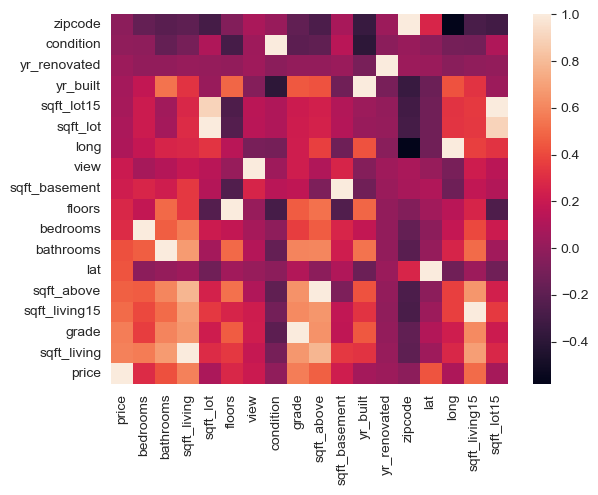

In [297]:
import seaborn as sns

sns.set_style("darkgrid")

corr_matrix = eda_df.corr().sort_values("price")
sns.heatmap(corr_matrix);

### Observations

The heat map confirms the correlation table we saw before.

A function was created to visualize price against various columns.

In [298]:
def price_vs_column(column, alias, reg = True):
    if reg:
        ax = sns.regplot(
            x=eda_df[column],
            y=eda_df.price,
            line_kws={
                "color" : "green"
            }
        )
        ax.set(
            xlabel=alias,
            ylabel="Price (in Thousands)",
            title="{} vs Price".format(alias)
        );
    else:
        ax = sns.scatterplot(
            x=eda_df[column],
            y=eda_df.price,
        )
        ax.set(
            xlabel=alias,
            ylabel="Price (in Thousands)",
            title="{} vs Price".format(alias)
        );

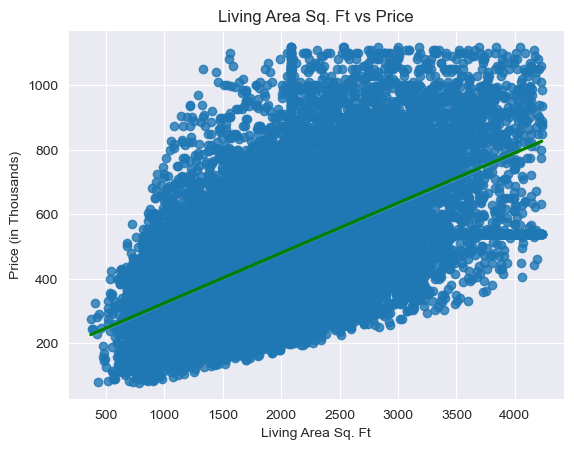

In [299]:
price_vs_column("sqft_living", "Living Area Sq. Ft")

### Observations

We see that as living area square footage increases, so does the price.

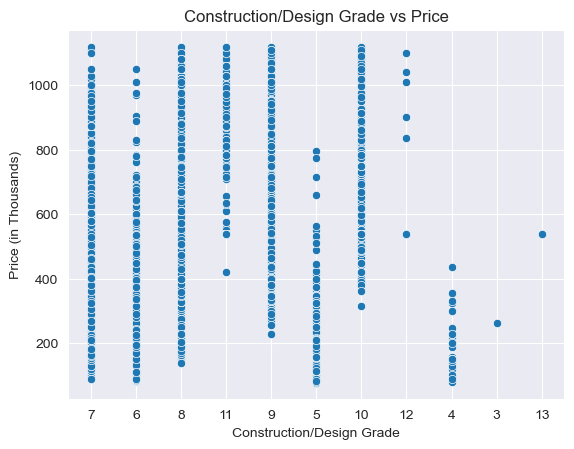

In [300]:
price_vs_column("grade", "Construction/Design Grade", reg=False)

### Observations

All grades contain prices across the whole spectrum.

Next, we view the effect of number of bedrooms on price.

bedrooms
3.000000    9791
4.000000    6865
2.000000    2754
5.000000    1596
3.373038     528
Name: count, dtype: int64


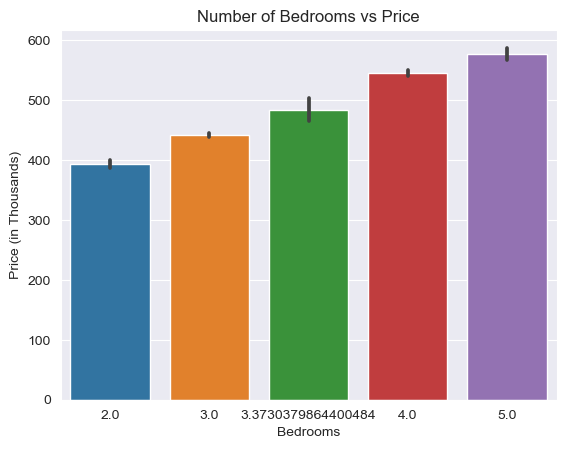

In [301]:
print(eda_df.bedrooms.value_counts())
ax = sns.barplot(x=eda_df.bedrooms, y=eda_df.price)
ax.set(
    xlabel = "Bedrooms",
    ylabel = "Price (in Thousands)",
    title = "Number of Bedrooms vs Price"
);

### Observations

As the number of bedrooms increases, so does the average price, but the most popular choice among customers was 3 bedrooms.

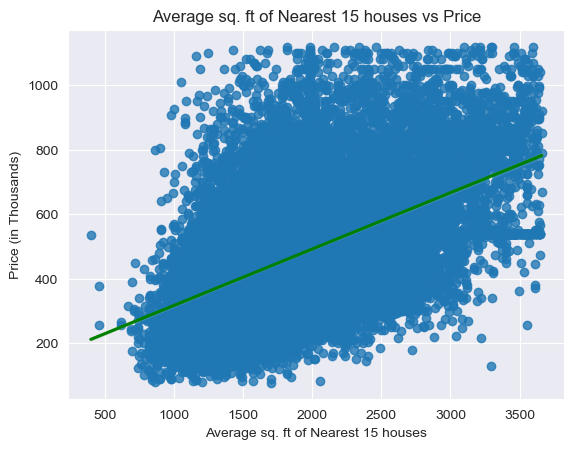

In [302]:
price_vs_column("sqft_living15", "Average sq. ft of Nearest 15 houses")

### Observations

As the sqaure footage of the surrounding houses increases, so does the price of the house.

## Modeling

First, we examine the data.

In [303]:
modeling_df = eda_df.copy()
modeling_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221.9,3.0,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,0.0,1955.0,0.000000,98178.0,47.5112,-122.257,1340.0,5650.0
1,538.0,3.0,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,400.0,1951.0,83.742215,98125.0,47.7210,-122.319,1690.0,7639.0
2,180.0,2.0,1.00,770.0,10000.0,1.0,0,0,6,770.0,0.0,1933.0,83.742215,98028.0,47.7379,-122.233,2720.0,8062.0
3,604.0,4.0,3.00,1960.0,5000.0,1.0,0,2,7,1050.0,910.0,1965.0,0.000000,98136.0,47.5208,-122.393,1360.0,5000.0
4,510.0,3.0,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,0.0,1987.0,0.000000,98074.0,47.6168,-122.045,1800.0,7503.0


Location columns are dropped so as to preserve the privacy of the home owners.

In [304]:
modeling_df.drop("lat", axis=1, inplace=True)
modeling_df.drop("long", axis=1, inplace=True)
modeling_df.drop("zipcode", axis=1, inplace=True)
modeling_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221.9,3.0,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,0.0,1955.0,0.000000,1340.0,5650.0
1,538.0,3.0,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,400.0,1951.0,83.742215,1690.0,7639.0
2,180.0,2.0,1.00,770.0,10000.0,1.0,0,0,6,770.0,0.0,1933.0,83.742215,2720.0,8062.0
3,604.0,4.0,3.00,1960.0,5000.0,1.0,0,2,7,1050.0,910.0,1965.0,0.000000,1360.0,5000.0
4,510.0,3.0,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,0.0,1987.0,0.000000,1800.0,7503.0


A function that shows correlations of a particular column.

In [305]:
def column_corr(column):
    return modeling_df.corr()[column].sort_values(ascending=False)

In [306]:
column_corr("price")

price            1.000000
sqft_living      0.581669
grade            0.573017
sqft_living15    0.508827
sqft_above       0.474044
bathrooms        0.424381
bedrooms         0.290729
floors           0.274164
sqft_basement    0.222340
view             0.203565
sqft_lot         0.086452
sqft_lot15       0.067868
yr_built         0.061169
yr_renovated     0.030432
condition       -0.013279
Name: price, dtype: float64

#### Simple Linear Regression

As living area square footage has the most correlation with price, we ues it to build a simple model.

In [307]:
from statsmodels.formula.api import ols

formula = "price ~ sqft_living"
model = ols(formula, modeling_df).fit()
summary = model.summary()
print("Model is significant: {}".format(model.f_pvalue < 0.05))
print(summary)

Model is significant: True
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                 1.101e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        02:42:59   Log-Likelihood:            -1.4049e+05
No. Observations:               21534   AIC:                         2.810e+05
Df Residuals:                   21532   BIC:                         2.810e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     169.1084 

#### Observations
- The model only describes about 33% of the variation of the price and thus is not efective.
- An intercept coefficient of 169.1084 (in thousands) tells us that a house with 0 square foot living area will cost $169,108.40.
- With a coefficient of 0.1554 (in thousands), we can expect the price of a house to rise by about $155.40 per square foot added.
- Both the intercept and sqft_living coeffiients are statistically significant as shown by their low p value scores.
- A Kurtosis score of greater than 3 indicates that the dstribution has heavier tails probably due to outliers.
- A skewness of 0.660 tells us that the distribution has a moderate positive skew. This means that the distribution has more values extending towards the higher end.

### Multiple Linear Regression

Next we test if adding all columns will improve the model.

A function that returns all independent columns in formula form and another that creates a model using all independent variables.

In [308]:
def all_columns():
    return "+".join(modeling_df.columns.difference(["price"]))
all_columns()

def model_all_independent():
    multi_formula = "price ~ "+all_columns()
    return ols(multi_formula, modeling_df).fit()

In [309]:
multi_model = model_all_independent()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     70.47
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        02:43:07   Log-Likelihood:            -1.3708e+05
No. Observations:               21534   AIC:                         2.748e+05
Df Residuals:                   21210   BIC:                         2.774e+05
Df Model:                         323                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4

#### Observations
- The year renovated variable and many of the sqft_basement dummy variables are not statistically significant. As a result we will drop the columns.
- As a whole the model explains the variance in price much better than the simple regression model (~51% as opposed to ~33%)

In [310]:
to_drop = ["yr_renovated", "sqft_basement"]
modeling_df.drop(columns=to_drop, inplace=True)
modeling_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221.9,3.0,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,1955.0,1340.0,5650.0
1,538.0,3.0,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,1951.0,1690.0,7639.0
2,180.0,2.0,1.00,770.0,10000.0,1.0,0,0,6,770.0,1933.0,2720.0,8062.0
3,604.0,4.0,3.00,1960.0,5000.0,1.0,0,2,7,1050.0,1965.0,1360.0,5000.0
4,510.0,3.0,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,1987.0,1800.0,7503.0


In [311]:
multi_model = model_all_independent()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1047.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        02:43:08   Log-Likelihood:            -1.3735e+05
No. Observations:               21534   AIC:                         2.748e+05
Df Residuals:                   21512   BIC:                         2.749e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4610.3186     88.506     52.091

#### Observations
- Dropping the variables did not impede the models ability to explain the variance in price.
- The models f statistic rose significantly.

##### Price Increase Factors
The biggest contributors to a high price house are:
- Number of floors with added value of $19,792.10 for each additional floor
- Number of bathrooms which adds an additional $16,470.20 for each bathroom
- Condition of the house which contributes $9,195.20 for every increase in ranking